In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
sys.path.insert(0,'../environments/'); import gw
sys.path.insert(0,'../environments/'); import gridworld_plotting as gp
sys.path.insert(0,'../rl_network/'); import ac
sys.path.insert(0,'../memory/'); import episodic as ec

In [2]:
import experiment as expt

In [3]:
reload(expt)
reload(gw)
reload(ac)
rows, columns = 20,20
env_type = None
penalty = -0.01 

NUM_TRIALS = 3000
NUM_EVENTS = 100


reward_location = (3,3)
env = gw.GridWorld(rows=rows,cols=columns,env_type=env_type,
                       rewards = {reward_location:1},
                       step_penalization=penalty,
                       rho=0.0,
                       rewarded_action = None)
    
agent_params = {
    'load_model':  False,
    'load_dir':    f'../data/outputs/{rows}x{columns}_MFonly.pt',
    'freeze_w':    False,

    'input_dims':  env.observation.shape,
    'action_dims': len(env.action_list),
    'hidden_types':['conv','pool','conv', 'pool', 'linear','linear'],
    'hidden_dims': [None, None, None, None, 100, 200],

    'rfsize':      5,

    'gamma':       0.98,
    'eta':         5e-4,

    'use_EC':      True,
    'EC':          {},
    'cachelim':    300,
    'mem_temp':    1
    }
agent = ac.make_agent(agent_params)

data = {'total_reward': [],
        'loss': [[],[],[]],
        'trial_length': [],
        'trials_run_to_date':0,
        'pol_tracking':[],
        'val_tracking':[],
        'ec_tracking': [],
        't': [],
        'mfcs':[]
       }

In [6]:
ex = expt.test_expt(agent, env)
ex.run(3000,100, data, around_reward=False)

0: -1.0000000000000007 (0.19231009483337402s)
300: 0.97 (16.741276502609253s)
600: 0.7599999999999999 (10.676835298538208s)
900: 0.7899999999999999 (10.91735577583313s)
1200: 0.98 (10.334332466125488s)
1500: 0.86 (10.111664056777954s)
1800: 0.7899999999999999 (9.533569812774658s)
2100: 0.91 (9.444453477859497s)
2400: 0.7999999999999999 (9.54222059249878s)
2700: 0.88 (9.706114768981934s)
2999: 0.7799999999999999 (9.632011651992798s)


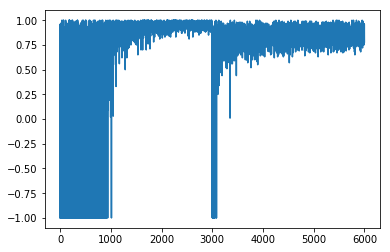

In [7]:
plt.plot(data['total_reward'])

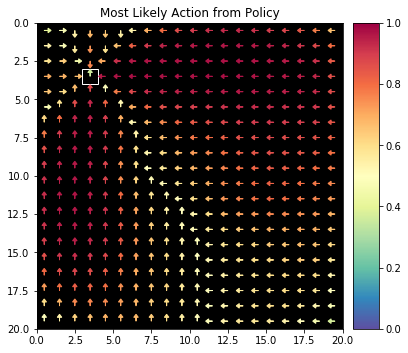

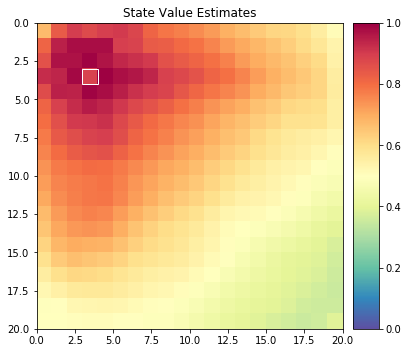

In [8]:
reload(expt)
sample_observations = env.get_sample_obs()
pol_grid, val_grid = expt.get_snapshot(sample_observations, env,agent)
gp.plot_polmap(env, pol_grid, threshold = 0.25)
gp.plot_valmap(env, val_grid, v_range = [0,1])

In [9]:
print(data['trials_run_to_date'])

6000


In [10]:
#savedir = f'../data/outputs/{rows}x{columns}_MFonly.pt'
#ac.torch.save(agent,savedir)